**The data for this analysis was sourced from Kaggle, and I conducted this study to practice and prepare for a career in data analytics. You can find the dataset here: [Kaggle Dataset](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard).
Feedback or collaboration is always welcome!**

During the year, Uber rides painted a clear story of how urban mobility is shaped by work and lifestyle. With over **41,000 rides completed**, the platform proved essential for daily commuting, yet the journey was far from seamless. The data reveals that while **working hours and evenings** drove the highest demand, they also exposed the biggest gaps, with *thousands of riders left stranded by driver shortages and cancellations*. Customers showed a strong preference for affordable choices like **Autos, Minis, and Bikes**, while the growing use of **eBikes** hinted at a shift toward eco-friendly travel. *Cancellation reasons uncovered deeper behavioral patterns:**riders frequently abandoned trips due to wrong addresses or drivers not moving**, while drivers cited customer issues, over-capacity bookings, and personal constraints.* High activity around **metros, hospitals, and IT hubs** highlighted Uber’s role in connecting the city’s busiest touchpoints. Ratings reflected a generally positive experience, but not without inconsistencies that signal room for service improvement. Altogether, the numbers tell a story of success tempered by operational challenges — one where smarter supply alignment, better communication, and investment in affordable and sustainable mobility could turn today’s pain points into next year’s growth opportunities.

In [47]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/ncr_ride_bookings.csv')
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [48]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [49]:
data.shape

(150000, 21)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [51]:
data.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [52]:
print(data['Payment Method'].unique())
print(data['Payment Method'].dtype)

[nan 'UPI' 'Debit Card' 'Cash' 'Uber Wallet' 'Credit Card']
object


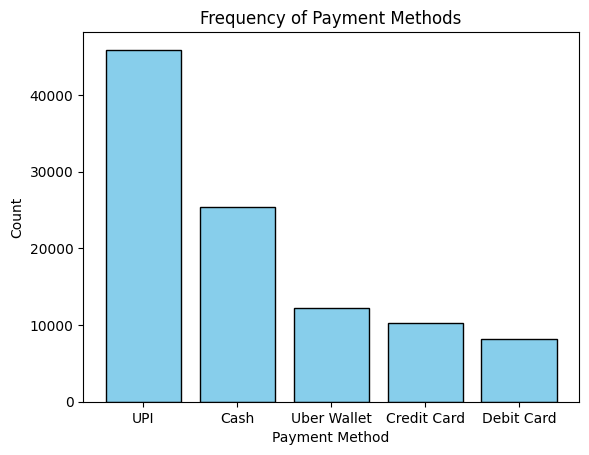

In [53]:
import matplotlib.pyplot as plt
counts = data['Payment Method'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Frequency of Payment Methods')
plt.show()


In [54]:
percentages = data['Payment Method'].value_counts(normalize=True) * 100
print(percentages)

Payment Method
UPI            45.008824
Cash           24.869608
Uber Wallet    12.035294
Credit Card    10.008824
Debit Card      8.077451
Name: proportion, dtype: float64


In [55]:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
data['Time'].dtype

/tmp/ipython-input-725042984.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


dtype('<M8[ns]')

Time_Category
Working Hours    70404
Evening          52221
Early Hours      19172
Late Evening      8203
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution by Time of Day')

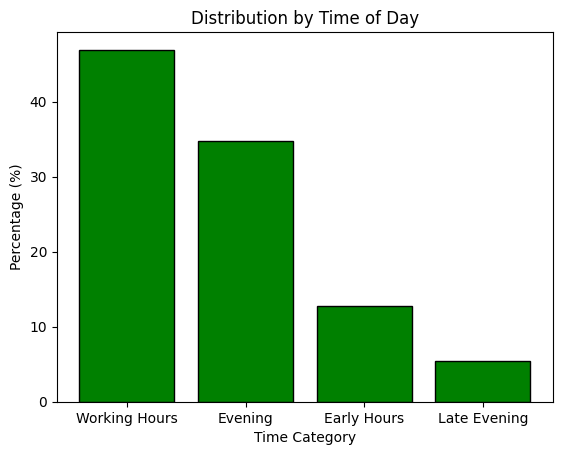

In [56]:
def categorize_time(hour):
    if 8 <= hour < 17:
        return 'Working Hours'
    elif 17 <= hour < 22:
        return 'Evening'
    elif 22 <= hour < 24:
        return 'Late Evening'
    else:
        return 'Early Hours'

data['Time_Category'] = data['Hour'].apply(categorize_time)
print(data['Time_Category'].value_counts())
percentages = data['Time_Category'].value_counts(normalize=True) * 100

plt.bar(percentages.index, percentages.values, color='green', edgecolor='black')
plt.xlabel('Time Category')
plt.ylabel('Percentage (%)')
plt.title('Distribution by Time of Day')

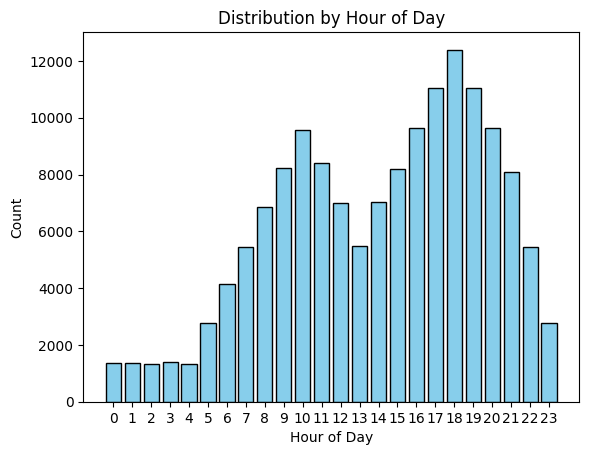

In [57]:
hour_counts = data['Hour'].value_counts().sort_index()
plt.bar(hour_counts.index, hour_counts.values, color='skyblue', edgecolor='black')
plt.xticks(range(24))  # show all 24 hours on x-axis
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Distribution by Hour of Day')
plt.show()

In [58]:
hourly_counts = data.groupby(['Time_Category', 'Hour']).size().reset_index(name='Customer_Count')

category_avg = hourly_counts.groupby('Time_Category')['Customer_Count'].mean().reset_index()
print(category_avg)

   Time_Category  Customer_Count
0    Early Hours     2396.500000
1        Evening    10444.200000
2   Late Evening     4101.500000
3  Working Hours     7822.666667


In [59]:
booking_counts=data['Booking Status'].value_counts().sort_index()
print(booking_counts)

Booking Status
Cancelled by Customer    10500
Cancelled by Driver      27000
Completed                93000
Incomplete                9000
No Driver Found          10500
Name: count, dtype: int64


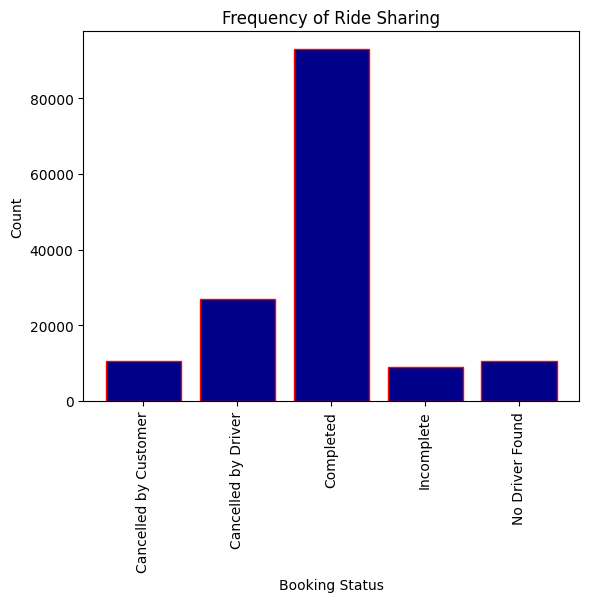

In [60]:
plt.bar(booking_counts.index, booking_counts.values, color='darkblue', edgecolor='red')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Frequency of Ride Sharing')
plt.xticks(rotation=90)
plt.show()

In [61]:
Nodriverfound=data[data['Booking Status']== 'No Driver Found']
Nodriverfound.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10500 entries, 0 to 149992
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               10500 non-null  object        
 1   Time                               10500 non-null  datetime64[ns]
 2   Booking ID                         10500 non-null  object        
 3   Booking Status                     10500 non-null  object        
 4   Customer ID                        10500 non-null  object        
 5   Vehicle Type                       10500 non-null  object        
 6   Pickup Location                    10500 non-null  object        
 7   Drop Location                      10500 non-null  object        
 8   Avg VTAT                           0 non-null      float64       
 9   Avg CTAT                           0 non-null      float64       
 10  Cancelled Rides by Customer        0 n

In [62]:


# Filter 'No Driver Found'
no_driver = data[data['Booking Status'] == 'No Driver Found'].copy()
print(no_driver['Time_Category'].value_counts())



Time_Category
Working Hours    4924
Evening          3633
Early Hours      1380
Late Evening      563
Name: count, dtype: int64


In [63]:
data['Pickup Location'].value_counts()

,count
Pickup Location,
Khandsa,949
Barakhamba Road,946
Saket,931
Badarpur,921
Pragati Maidan,920
...,...
Mandi House,800
Noida Sector 18,799
Laxmi Nagar,797


In [64]:
location_counts = no_driver['Pickup Location'].value_counts()

# If too many locations, pick top 20 for clarity
location_counts.head(10)

,count
Pickup Location,
Old Gurgaon,83
Pataudi Chowk,80
Paharganj,79
Greater Noida,77
Vinobapuri,76
Rohini West,75
Dwarka Mor,72
Pitampura,72
Udyog Bhawan,71


/tmp/ipython-input-844748608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vehicle Type', data=data, order=data['Vehicle Type'].value_counts().index, palette='coolwarm')


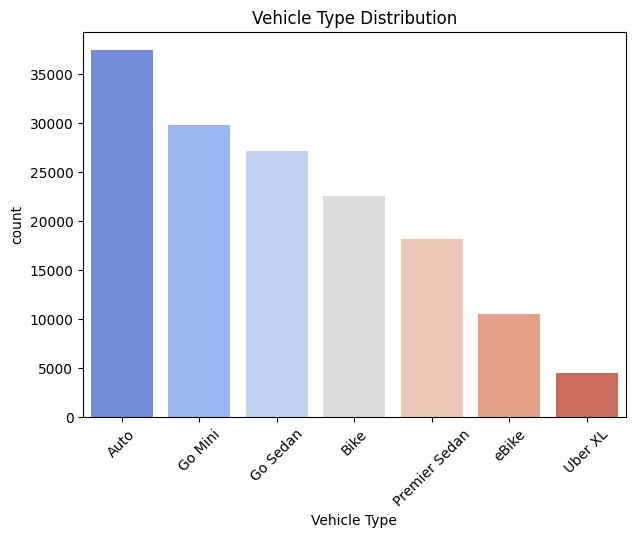

In [65]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.countplot(x='Vehicle Type', data=data, order=data['Vehicle Type'].value_counts().index, palette='coolwarm')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1551931353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette='Blues_r')
/tmp/ipython-input-1551931353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, ax=axes[1], palette='Greens_r')


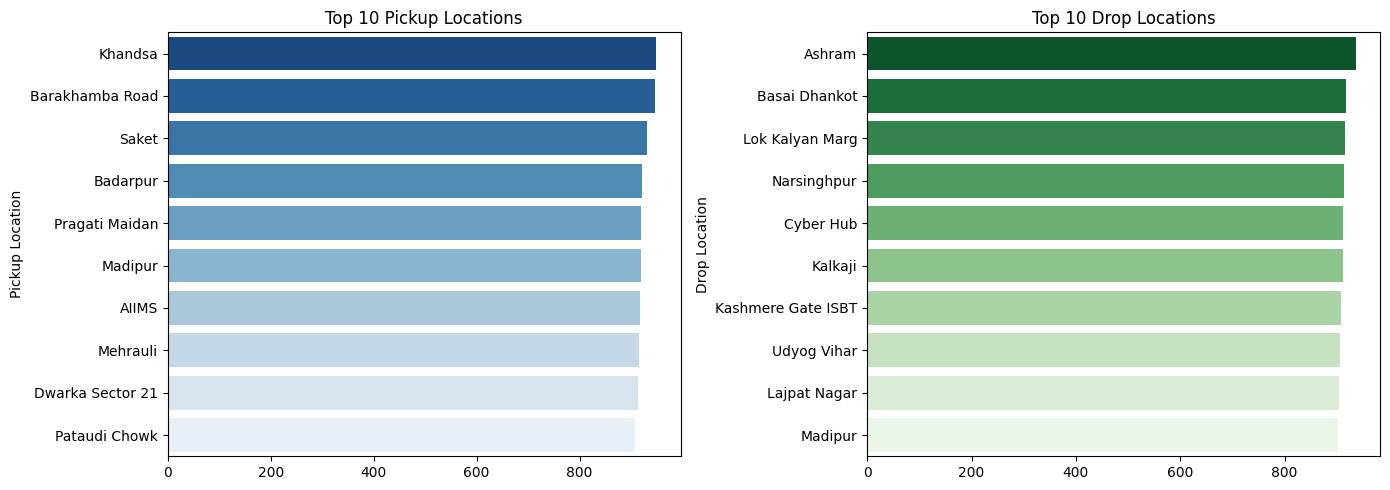

In [66]:
top_pickups = data['Pickup Location'].value_counts().head(10)
top_drops = data['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette='Blues_r')
axes[0].set_title("Top 10 Pickup Locations")
sns.barplot(x=top_drops.values, y=top_drops.index, ax=axes[1], palette='Greens_r')
axes[1].set_title("Top 10 Drop Locations")
plt.tight_layout()
plt.show()

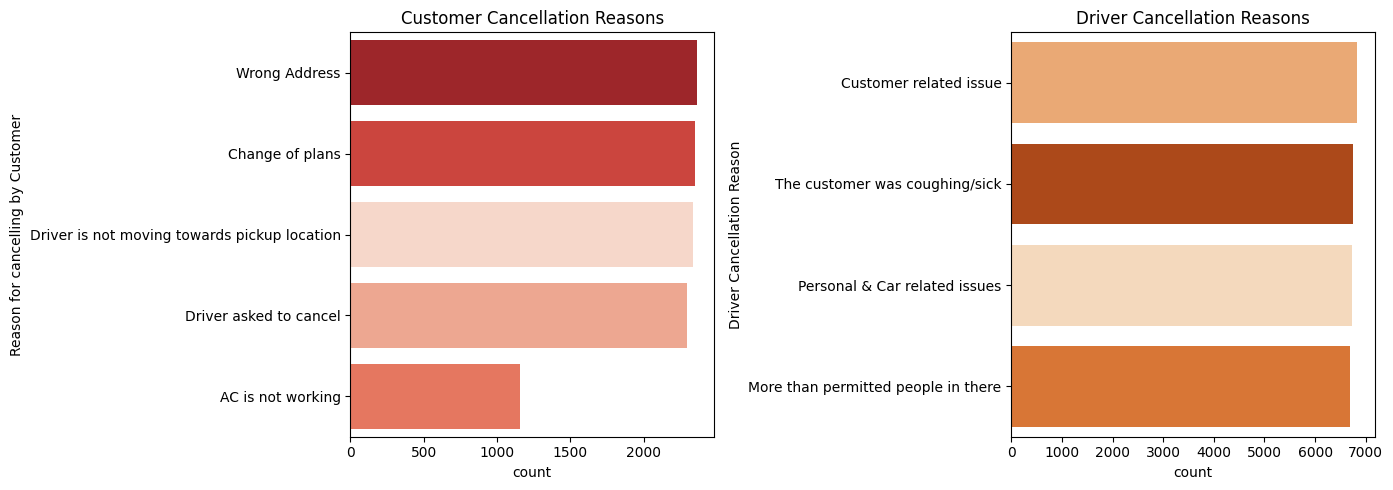

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(y='Reason for cancelling by Customer', data=data, order=data['Reason for cancelling by Customer'].value_counts().index, ax=axes[0],  hue='Reason for cancelling by Customer',
    palette='Reds',
    legend=False
)
axes[0].set_title("Customer Cancellation Reasons")
sns.countplot(y='Driver Cancellation Reason', data=data, order=data['Driver Cancellation Reason'].value_counts().index, ax=axes[1], hue='Driver Cancellation Reason',
    palette='Oranges',
    legend=False)
axes[1].set_title("Driver Cancellation Reasons")
plt.tight_layout()
plt.show()

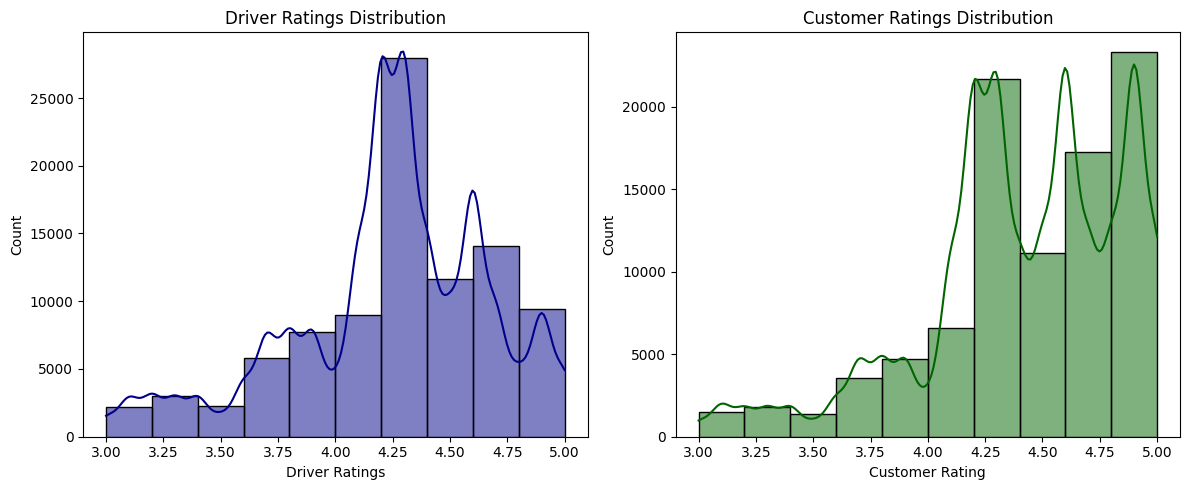

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='darkblue')
axes[0].set_title("Driver Ratings Distribution")
sns.histplot(data['Customer Rating'], bins=10, kde=True, ax=axes[1], color='darkgreen')
axes[1].set_title("Customer Ratings Distribution")
plt.tight_layout()
plt.show()

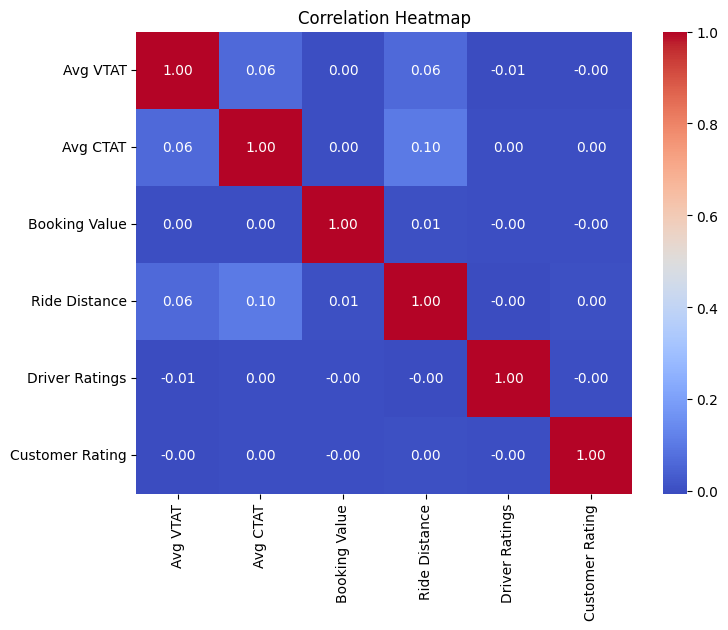

In [69]:
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()